# LOGISTIC REGRESSION

In short, logistic regression tries to fit the cumulative distribution function (cdf).

$$P(x_i=\text{feasible})=\frac{1}{1+\exp(-kx_i)}$$

This is done through finding the maximum likelyhood of $k$ which could generate our data. The choise of the logit function (above) is simply due due to it's flexibility, strictly increasing and in the value space of $[0,1]$ which is necessary for a cdf.

## Outline
1. Preprocessing
2. Model exploration
    * Hyperparameter tuning
    * Results
3. Conclusion

# Preprocessing
importing all necessary libraries

In [1]:
# external
import matplotlib.pyplot as plt
# internal
from utils.import_data import importData
from utils.model_tester import ModelTester
import utils.nicer_plots

And loading our data

In [2]:
file_data = "data2.csv"
file_labels = "labels2.csv"
n_features = -1         # = choose all features
directory = "\data\\"

data, labels = importData(file_data, file_labels, directory, n_features, iterations=False)

Number of samples:    102400
Number of features:   3851


# Model exploration
Our logistic regression module is also a part of [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)!



In [3]:
from warnings import filterwarnings
filterwarnings('ignore') # :)
# import model
from sklearn.linear_model import LogisticRegression
# initialize object
mt = ModelTester(data, labels, LogisticRegression) # everything after the model are the hyperparameters

## Hyperparameter tuning

In [4]:
parameters = {'penalty':['l2'],# ['l1', 'l2', 'elasticnet','none'],
              'C':[0.01,0.05,0.1,0.5,1,5,10],
              'fit_intercept':[False,True], #[True, False],
              'class_weight':["balanced"],
              'max_iter':[10**3],
              'solver':['saga']
}
mt.hyperparameter_tuning(n_train = 8, n_test = 2, n_epochs = 1, update_parameters = True, sampling = 'over', **parameters)

100%|██████████| 14/14 [1:17:06<00:00, 330.48s/it]


   Ranking  penalty        C  fit_intercept    class_weight      max_iter  solver      balanced_accuracy    Standard deviation
---------  ---------  -----  ---------------  --------------  ----------  --------  -------------------  --------------------
        1  l2         10     True             balanced              1000  saga                 0.51971                      0
        2  l2          0.5   False            balanced              1000  saga                 0.519403                     0
        3  l2          5     False            balanced              1000  saga                 0.518546                     0
        4  l2          5     True             balanced              1000  saga                 0.518546                     0
        5  l2         10     False            balanced              1000  saga                 0.518532                     0
        6  l2          1     True             balanced              1000  saga                 0.517389             

**Note** that the standard deviation is equal to zero since every model was trained only once. So we have a high risk of the best results stemming from chance.

The best parameters are saved!

## Results
Let's dig deeper into the results after finding the best combination from above

variable                             average     std  95.0% CI             min     max
---------------------------------  ---------  ------  ----------------  ------  ------
weighted accuracy [%]                  50.43    0.75  (49.89, 50.97)     49.02   51.65
duration [s]                          496.05  182.34  (365.61, 626.49)  286.23  707.68
infeasible_percentage [%]              82.56    2.4   (80.85, 84.28)     77.25   85.45
infeasible_guessed_percentage [%]      36.05    9.6   (29.18, 42.92)     22.61   49.71
feasible_recall [%]                    64.68    8.87  (58.33, 71.02)     51.31   77.66
feasible_precision [%]                 17.65    2.3   (16.01, 19.3)      15.05   22.48
infeasible_recall [%]                  36.19    9.76  (29.2, 43.17)      22.5    50.06
infeasible_precision [%]               82.79    2.69  (80.87, 84.71)     76.52   86.3
AUC of ROC                              0.49    0.01  (0.48, 0.5)         0.47    0.51
Weighted accuracies:


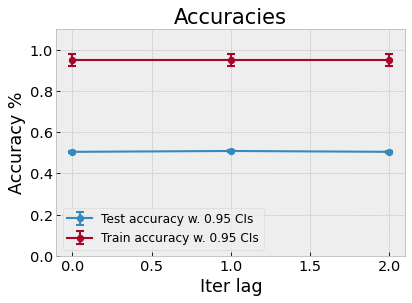

Test accuracies: [0.50431926 0.50855502 0.50441983]
Confusion matrices:


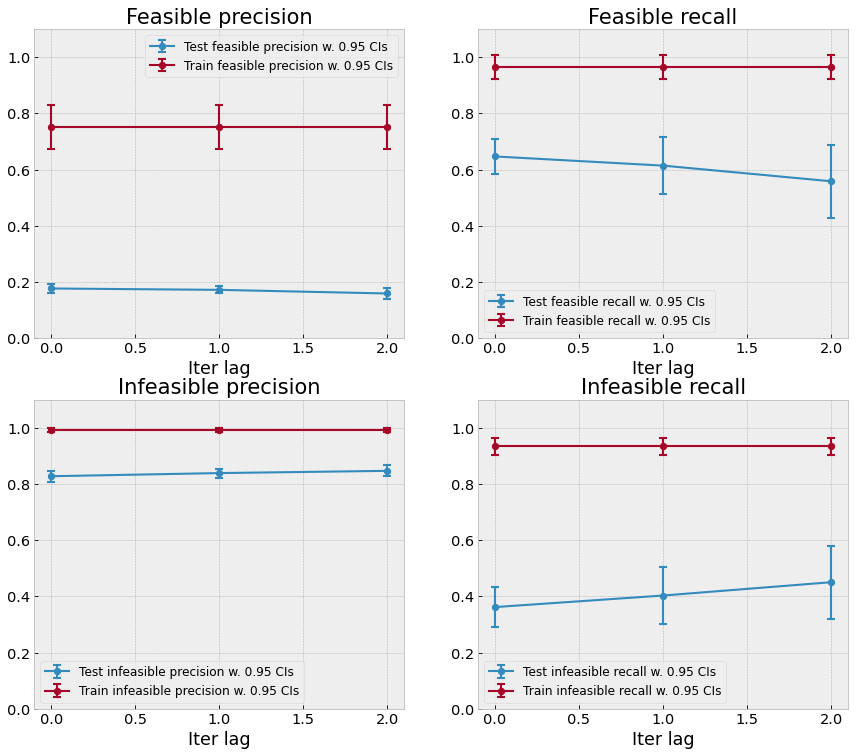

Percentage infeasible on test and train data:


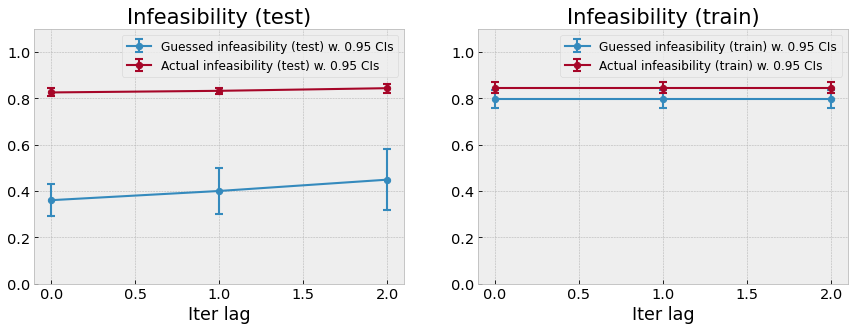

AUC:


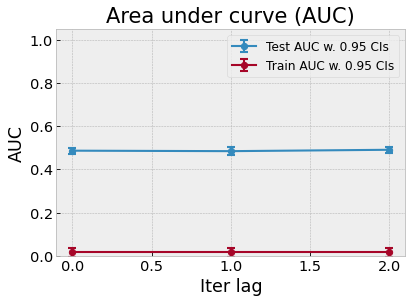

In [5]:
# run the training loop
mt.training_loop(sampling = "over")
mt.print_essentials()
mt.plot_graphs()

# Conclusion

Even logistic regression doesn't lead to any great results in our testing. 50.43% balanced accuracy after our hyperparameter tuning with a prediction interval which falls below the 50% mark with 95% certainty.